# 데이터 시각화 연습문제 (3) - seaborn 막대, 빈도 그래프

다음의 데이터는 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터의 일부이다.

| id | manufacturer | model | displ | year | cyl | trans      | drv | cty | hwy | fl | class   |
|----|--------------|-------|-------|------|-----|------------|-----|-----|-----|----|---------|
| 1  | audi         | a4    | 1.8   | 1999 | 4   | auto(l5)   | f   | 18  | 29  | p  | compact |
| 2  | audi         | a4    | 1.8   | 1999 | 4   | manual(m5) | f   | 21  | 29  | p  | compact |
| 3  | audi         | a4    | 2     | 2008 | 4   | manual(m6) | f   | 20  | 31  | p  | compact |
| 4  | audi         | a4    | 2     | 2008 | 4   | auto(av)   | f   | 21  | 30  | p  | compact |
| 5  | audi         | a4    | 2.8   | 1999 | 6   | auto(l5)   | f   | 16  | 26  | p  | compact |

전체 데이터는 아래의 URL을 통해 확인할 수 있다.

> https://data.hossam.kr/D01/mpg.xlsx

데이터는 234 개의 행이 있으며, 각 행은 다음과 같은 변수로 구성되어 있다.

| 변수 | 설명 |
|--|--|
| manufacturer | 자동차 제조사 |
| model | 자동차 모델명 |
| displ | 자동차 배기량 |
| year | 제조년도 |
| cyl | 엔진 실린더 수 |
| trans | 자동차 트랜스미션 종류 |
| drv | 자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동 |
| cty | 도심 연비 (마일/갤론) |
| hwy | 고속도로 연비 (마일/갤론) |
| fl | 연료 종류 |
| class | 자동차 분류 |

## 문제1
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

## 문제2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

## 문제3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

## 문제4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

## 문제5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

## 문제6
배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.
서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.


In [3]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
import seaborn as sb
import numpy as np

In [10]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

In [6]:
car = read_excel("https://data.hossam.kr/D01/mpg.xlsx", index_col="id")

# df = car.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
#                      "Cabin": "category", "Embarked": "category"})

car.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


##### 문제1 
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

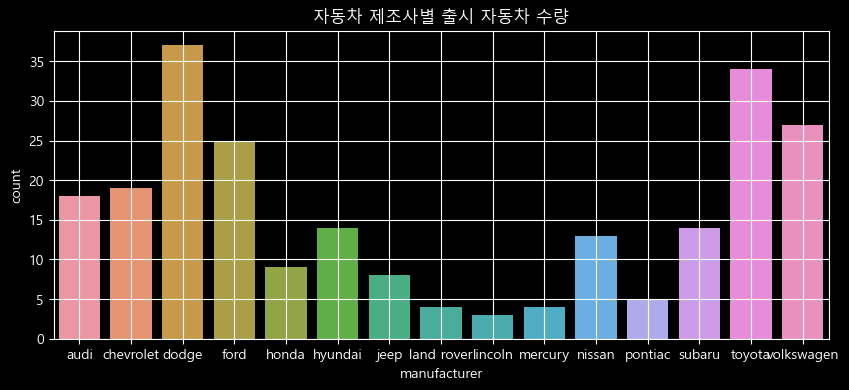

In [12]:
sb.countplot(data=car,x="manufacturer")
plt.title('자동차 제조사별 출시 자동차 수량')
plt.grid()
plt.show()
plt.close()

##### 문제2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

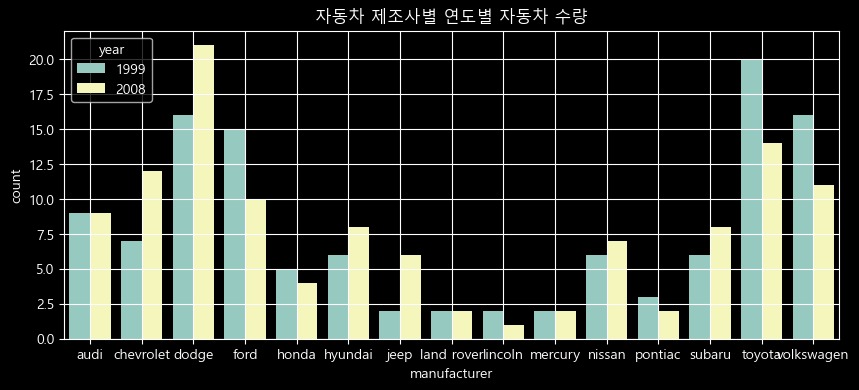

In [14]:
sb.countplot(data=car,x="manufacturer",hue='year')
plt.title('자동차 제조사별 연도별 자동차 수량')
plt.grid()
plt.show()
plt.close()

## 문제3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.
drv | 자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동

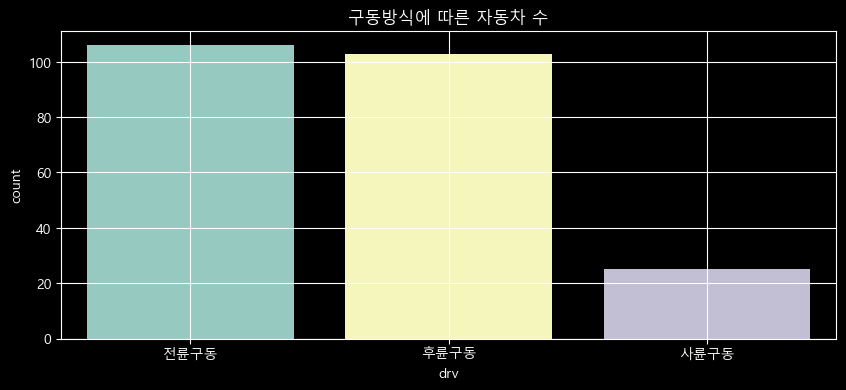

In [16]:
sb.countplot(data=car,x="drv")
plt.title('구동방식에 따른 자동차 수')
plt.xticks([0,1,2],['전륜구동','후륜구동','사륜구동']) # barplot에서 x좌표는 무조건 0부터 시작한다.[0,1,2..]로 하는 이유
plt.grid()
plt.show()
plt.close()

## 문제4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

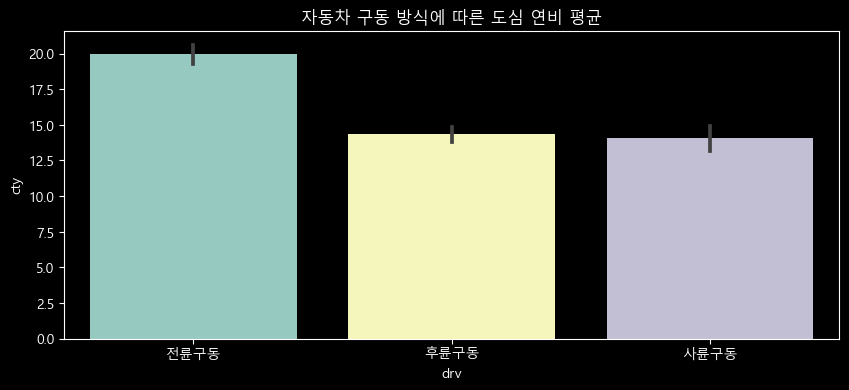

In [20]:
sb.barplot(data=car,x='drv',y='cty')
plt.title('자동차 구동 방식에 따른 도심 연비 평균')
plt.xticks([0,1,2],['전륜구동','후륜구동','사륜구동'])
plt.show()
plt.close()

## 문제5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

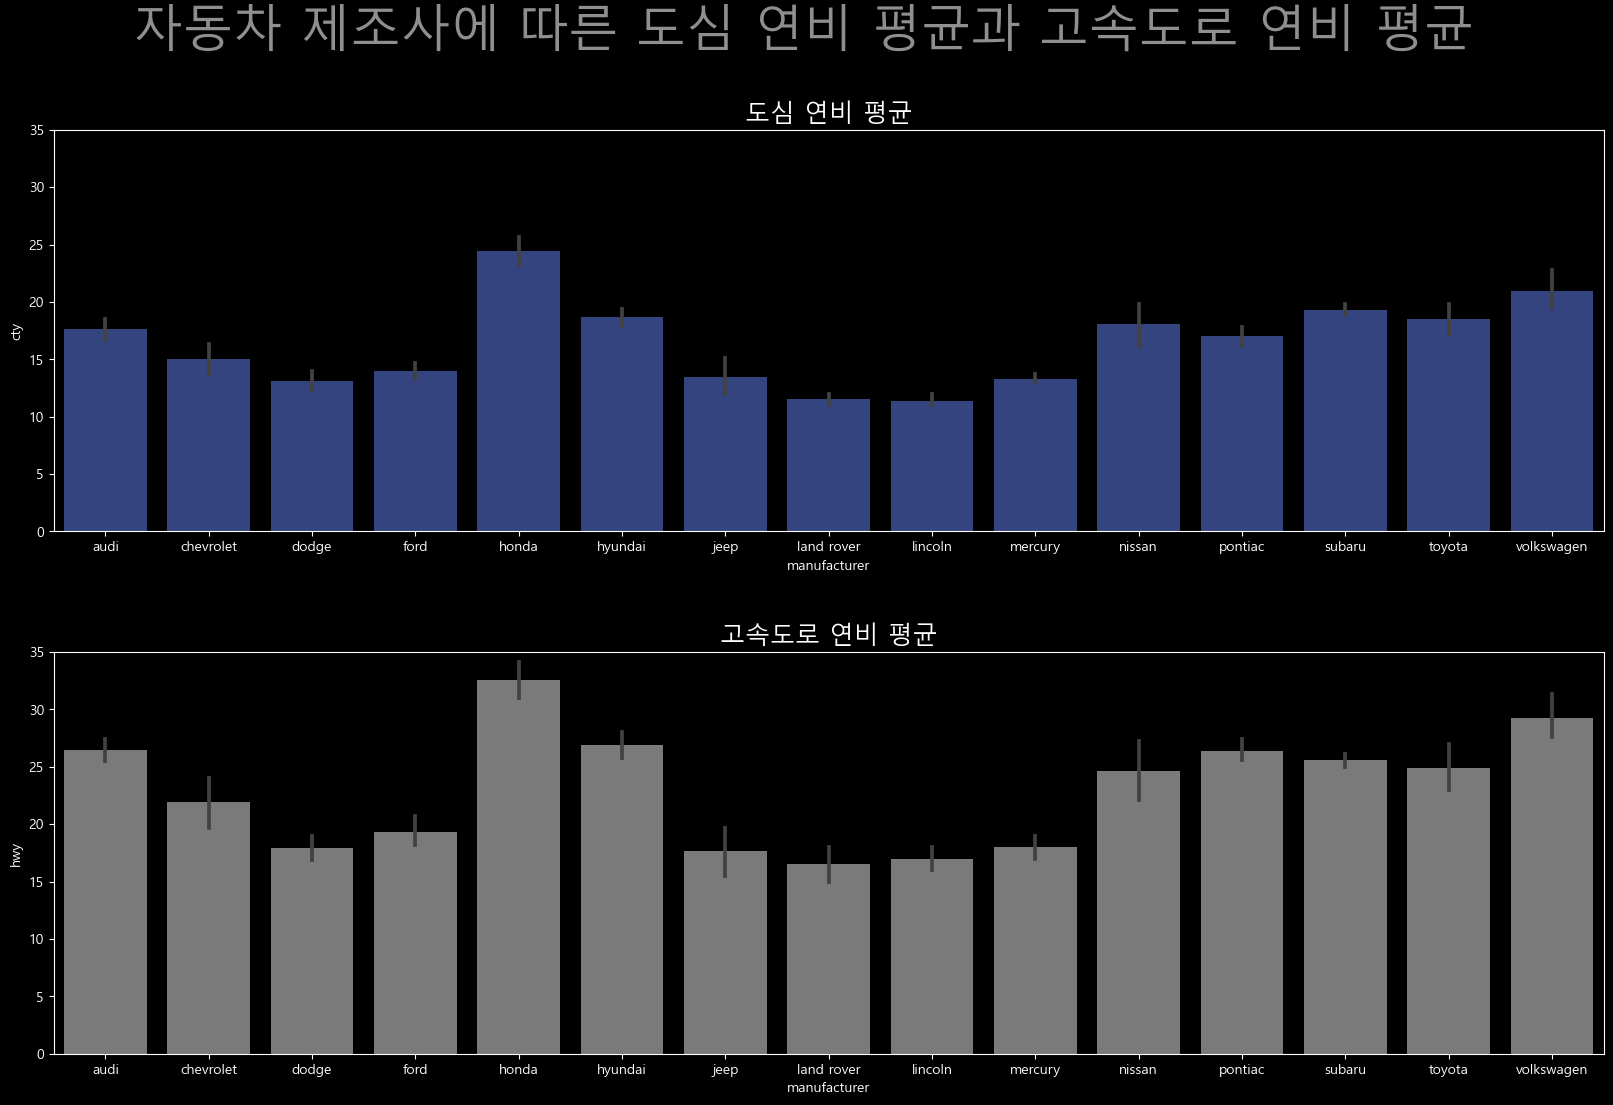

In [34]:
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 12))
fig.suptitle('자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균', fontsize=36, color='#8f8f8f')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.barplot(data=car, x='manufacturer', y='cty', color="#273d8c", ax=ax1_left)
ax1_left.set_title('도심 연비 평균', fontsize=18)
ax1_left.set_ylim(0, 35) 

sb.barplot(data=car, x='manufacturer', y='hwy', color="#7a7a7a", ax=ax2_left)
ax2_left.set_title('고속도로 연비 평균', fontsize=18)
ax2_left.set_ylim(0, 35) 

plt.show()
plt.close()

## 문제6
배기량(displ)과 도심연비(cty), 배기량과 고속도로 연비(hwy)의 상관관계를 확인하고자 한다.
서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.

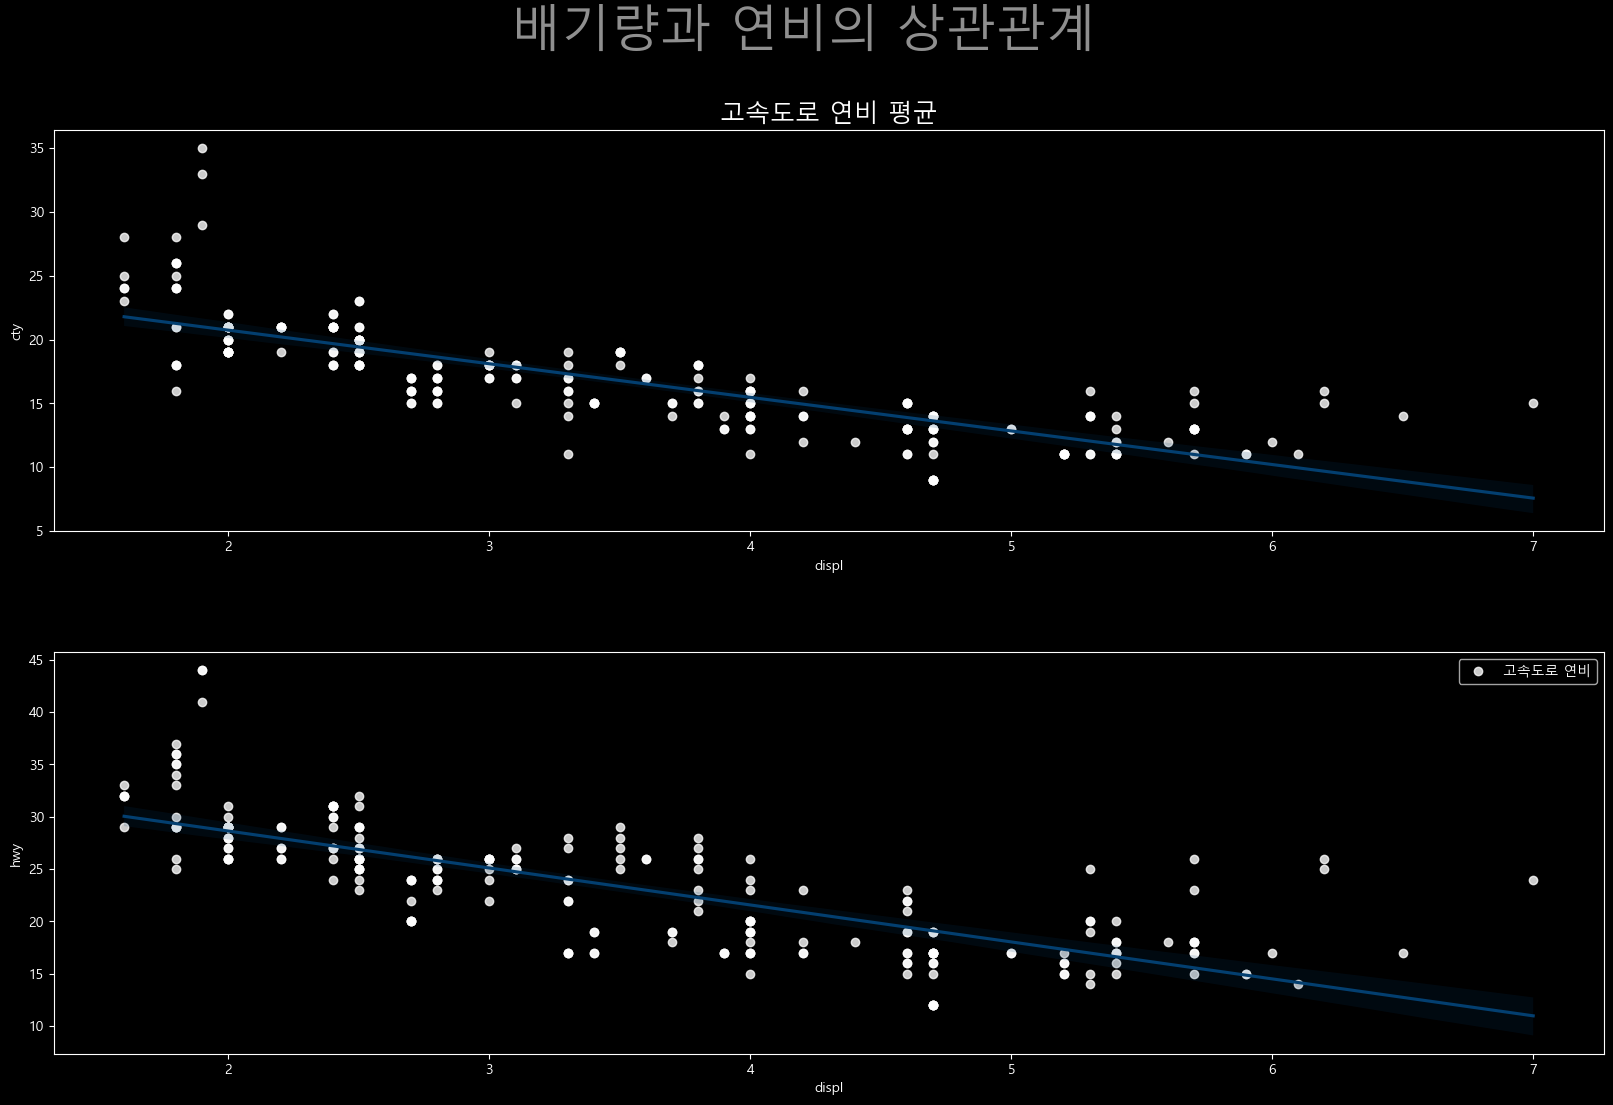

In [42]:
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 12))
fig.suptitle('배기량과 연비의 상관관계', fontsize=36, color='#8f8f8f')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.regplot(data=car,x='displ',y='cty',label='도심 연비',line_kws={'color':'#033f70'},scatter_kws={'color':'white'},ax=ax1_left)
ax1_left.set_title('도심 연비 평균', fontsize=18)
sb.regplot(data=car,x='displ',y='hwy',label='고속도로 연비',line_kws={'color':'#033f70'},scatter_kws={'color':'white'},ax=ax2_left)
ax1_left.set_title('고속도로 연비 평균', fontsize=18)

plt.legend()
plt.show()
plt.close()